In [1]:
## 딥러닝 동작원리 이어서 학습 
## MNIST 데이터셋을 이용하여 실습해보자 

'''
MNIST 손글씨 인식하기: 데이터 전처리
 28 × 28 = 784개의 속성을 이용해 0~9까지 10개 클래스 중 하나를 맞히는 분류 문제가 됩니다.
 Reshape() 함수를 사용하여 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 주어야 합니다.
 케라스는 데이터를 0에서 1 사이의 값으로 변환해야 구동할 때 최적의 성능을 보이므로 0~255 사이의
값으로 이루어진 값을 0~1 사이의 값으로 값을 255로 나누어 데이터 정규화(normalization) 합니다.
 Y_class를 np_utils.to_categorical(클래스, 클래스의 개수)를 사용하여 원-핫 인코딩 합니다.
'''

from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


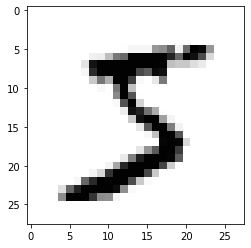

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [2]:
import matplotlib.pyplot as plt # 그래프로 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

for x in X_train[0]: # 코드로 확인
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

print("class : %d " % (Y_class_train[0])) # 클래스 값 확인

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

In [3]:
'''
MNIST 손글씨 인식하기: 딥러닝 실행
 딥러닝을 실행하고자 프레임을 설정( 총 784개의 속성, 10개의 클래스)
 입력 값(input_dim)이 784개, 은닉층이 512개 , 출력이 10개인 모델
 활성화 함수로 은닉층에서는 relu를, 출력층에서는 softmax를 사용합니다
 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정합니
다.
 샘플 200개를 모두 30번 실행하게끔 설정합니다.
 테스트셋으로 최종 모델의 성과를 측정하여 그 값을 출력합니다.
 학습셋의 정확도 대신 학습셋의 오차를 그래프로 표현해봅니다
 학습셋의 오차는 1에서 학습셋의 정확도를 뺀 값입니다.
'''
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import os

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









Epoch 00001: val_loss improved from inf to 0.15477, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/01-0.1548.hdf5

Epoch 00002: val_loss improved from 0.15477 to 0.10501, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/02-0.1050.hdf5

Epoch 00003: val_loss improved from 0.10501 to 0.08405, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/03-0.0841.hdf5

Epoch 00004: val_loss improved from 0.08405 to 0.07885, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/04-0.0788.hdf5

Epoch 00005: val_loss improved from 0.07885 to 0.06713, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/outpu

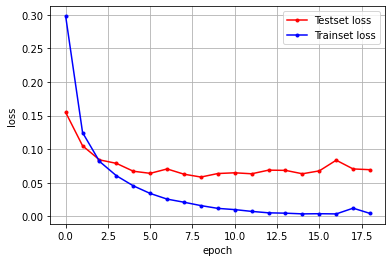

In [5]:
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
'''
컨볼루션 신경망(Convolutional Neural Network, CNN)
 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 신경망
 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터, 윈도 또는 커널이라고도 함)를 도입하는
기법
 입력층과 출력층 사이의 중간층(은폐층)에 합성곱과 풀링층을 배치한 것
 이미지를 흐리게 만들거나 경계를 강조하는 작업을 함
 합성곱층과 풀링층에서는 해상도를 낮추거나 샘플링하는 처리를 계속 반복함
'''

'''
 합성곱층은 '이미지'의 특징을 추출할 때 사용 → CNN은 이미지 분석에 주로 사용한다 
 입력 x의 일부분을 잘라내고, 가중치 필터 W를 적용해 특징 맵 c를 만들어 낼 때 사용
 입력 x의 일부분을 조금씩 자르면서 평활화와 윤곽선 검출 처리를 하며, 특징 맵 c를 추출
 합성곱층의 역할은 주변의 값과 필터를 사용해 중앙에 있는 값을 변화시키는 것
 평활화(Equalization) – 명암의 분포가 균일하지 못한 이미지에 적용해 분포를 균일하게 만들어주는 것
'''


"\n\uf0a7 합성곱층은 '이미지'의 특징을 추출할 때 사용 → CNN은 이미지 분석에 주로 사용한다 \n\uf0a7 입력 x의 일부분을 잘라내고, 가중치 필터 W를 적용해 특징 맵 c를 만들어 낼 때 사용\n\uf0a7 입력 x의 일부분을 조금씩 자르면서 평활화와 윤곽선 검출 처리를 하며, 특징 맵 c를 추출\n\uf0a7 합성곱층의 역할은 주변의 값과 필터를 사용해 중앙에 있는 값을 변화시키는 것\n\uf0a7 평활화(Equalization) – 명암의 분포가 균일하지 못한 이미지에 적용해 분포를 균일하게 만들어주는 것\n"

In [7]:
'''
• 대화형 인공지능 - 문장을 듣고 무엇을 의미하는지를 알아야 서비스를 제공
• 문장 학습 - 여러 개의 단어로 이루어진 문장의 각 단어가 정해진 순서대로 입력되어야 의미를 전달 할 수
있으므로 입력된 데이터 사이의 관계를 고려해야 합니다.
• 순환 신경망(Recurrent Neural Network, RNN)은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받
은 데이터를 잠시 기억해 놓는 방법입니다.
• 모든 입력 값에 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 층으로 데이터로
넘어갑니다.
'''


'\n• 대화형 인공지능 - 문장을 듣고 무엇을 의미하는지를 알아야 서비스를 제공\n• 문장 학습 - 여러 개의 단어로 이루어진 문장의 각 단어가 정해진 순서대로 입력되어야 의미를 전달 할 수\n있으므로 입력된 데이터 사이의 관계를 고려해야 합니다.\n• 순환 신경망(Recurrent Neural Network, RNN)은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받\n은 데이터를 잠시 기억해 놓는 방법입니다.\n• 모든 입력 값에 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 층으로 데이터로\n넘어갑니다.\n'

In [0]:
# 컨볼루전 신경망을 적용한 MNIST
# fiter, pooling, Dropout 적용
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tf.set_random_seed(seed)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [9]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# 모델 최적화 설정
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss improved from inf to 0.06006, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/01-0.0601.hdf5

Epoch 00002: val_loss improved from 0.06006 to 0.04656, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/02-0.0466.hdf5

Epoch 00003: val_loss improved from 0.04656 to 0.03719, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/03-0.0372.hdf5

Epoch 00004: val_loss improved from 0.03719 to 0.03192, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/04-0.0319.hdf5

Epoch 00005: val_loss improved from 0.03192 to 0.02925, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/05-0.0292.hdf5

Epoch 00006: val_loss did not improve from 0.02925

Epoch 00007: val_loss

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

10000/10000 [==============================] - 1s 54us/step

 Test Accuracy: 0.9924


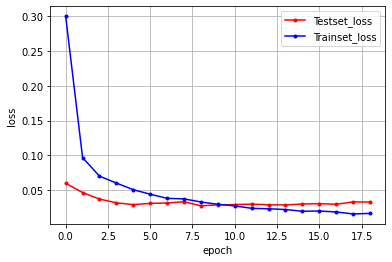

In [12]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
## 순환 신경망(Recurrent Neural Network, RNN)
'''
• 대화형 인공지능 - 문장을 듣고 무엇을 의미하는지를 알아야 서비스를 제공
• 문장 학습 - 여러 개의 단어로 이루어진 문장의 각 단어가 정해진 순서대로 입력되어야 의미를 전달 할 수
있으므로 입력된 데이터 사이의 관계를 고려해야 합니다.
• 순환 신경망(Recurrent Neural Network, RNN)은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받
은 데이터를 잠시 기억해 놓는 방법입니다.
• 모든 입력 값에 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 층으로 데이터로
넘어갑니다.
• 순환이 되는 가운데 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 주는 것을 알 수 있습니다.
이렇게 해야지만, 비슷한 두 문장이 입력되었을 때 그 차이를 구별하여 출력 값에 반영할 수가 있습니다.
'''

''' LSTM
• LSTM(Long Short Term Memory) : 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다
기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다.
• LSTM(Long Short Term Memory)은 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하
는 단계를 하나 더 추가하는 것입니다
'''

' LSTM\n• LSTM(Long Short Term Memory) : 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다\n기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다.\n• LSTM(Long Short Term Memory)은 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하\n는 단계를 하나 더 추가하는 것입니다\n'

In [14]:
''' 
※ 텍스트 마이닝 
비정형 데이터에서 의미있는 정보를 추출하는 기술

텍스트 분류 = 문장 또는 문서를 특정 카테고리로 분류, 예측
예) 신문기사와 같은 문서를 기사 내용에 따라 정치/경제/사회/문화등의 카테고리로 분류, 
    메일의 내용을 분석해서 스팸 메일 분류 

감정분석 = 텍스트에서 나타나는 감정/판단/의견 등의 주관적인 요소를 분석 하는 기법 
예) 소셜 미디어 분석, 영화나 제품에 대해서 긍정 또는 리뷰, 조사, 의견 분석등에 활용 

텍스트 요약 = 텍스트내에 중요한 주제, 결론, 중심사사 등을 추출하는 기법 
예) 텍스트 군집화, 텍스트 유사도 측정 (중요한 문서에 대해서 표절여부 분석)

- NLP : 자연어 처리 라이브러리
        텍스트 분석을 향상시키는 기반 기술 

- NLTK : 자연어 처리 라이브러리
         Genism : 토픽 모델링 분야의 패키지 
         Spacy : 토픽 모델링 분야의 패키지, 성능이 뛰어남 

텍스트 분석 단계 
  " cleansing > 대소문자 변환 > 특수문자 제거 > 토큰화 >  의미없는 불용어 제거 
    > 어근 추출(Stemming/Lemmatization) > 텍스트 정규화 "

Feature Vectorization : 비정형 텍스트를 Feature 형태로 변환 (특성 추출)
BOW(Bag of Words), Word2Vect
   


NLTK  (자연어 처리 라이브러리 )
Gensim : 토픽 모델링 분야의 패키지
SpaCy :  토픽 모델링 분야의 패키지, 성능이 뛰어남

cleansing - nltk.download('punkt')
sent_tokenize()  문장 토큰화
word_tokenize() 단어 토큰화
2개의 단어, 3개의 단어 등으로 토큰화 : n-gram
필터링 : stop word 제거, 철자 수정 (Stemming/Lemmatization)
CountVectorizer
TfidfVectorizer

텍스트 정규화 : 
1. 클린징, 특수문자 제거, 소문자로 변환 등(전처리)
2. 토큰화(n-gram적용)
3. 정규화(stop word, 필터링 적용, Stemming/Lemmatization)
4. Feature Vectorizing - Coordinate 형식(0이 아닌 값의 행, 열 위치값 저장, CSR(Compressed Spare Row) 형식은 
   Coordinate 형식의 행과 열 위치값이 반복적인 값을 압축(차원축소)
'''

' \n※ 텍스트 마이닝 \n비정형 데이터에서 의미있는 정보를 추출하는 기술\n\n텍스트 분류 = 문장 또는 문서를 특정 카테고리로 분류, 예측\n예) 신문기사와 같은 문서를 기사 내용에 따라 정치/경제/사회/문화등의 카테고리로 분류, \n    메일의 내용을 분석해서 스팸 메일 분류 \n\n감정분석 = 텍스트에서 나타나는 감정/판단/의견 등의 주관적인 요소를 분석 하는 기법 \n예) 소셜 미디어 분석, 영화나 제품에 대해서 긍정 또는 리뷰, 조사, 의견 분석등에 활용 \n\n텍스트 요약 = 텍스트내에 중요한 주제, 결론, 중심사사 등을 추출하는 기법 \n예) 텍스트 군집화, 텍스트 유사도 측정 (중요한 문서에 대해서 표절여부 분석)\n\n- NLP : 자연어 처리 라이브러리\n        텍스트 분석을 향상시키는 기반 기술 \n\n- NLTK : 자연어 처리 라이브러리\n         Genism : 토픽 모델링 분야의 패키지 \n         Spacy : 토픽 모델링 분야의 패키지, 성능이 뛰어남 \n\n텍스트 분석 단계 \n  " cleansing > 대소문자 변환 > 특수문자 제거 > 토큰화 >  의미없는 불용어 제거 \n    > 어근 추출(Stemming/Lemmatization) > 텍스트 정규화 "\n\nFeature Vectorization : 비정형 텍스트를 Feature 형태로 변환 (특성 추출)\nBOW(Bag of Words), Word2Vect\n   \n\n\nNLTK  (자연어 처리 라이브러리 )\nGensim : 토픽 모델링 분야의 패키지\nSpaCy :  토픽 모델링 분야의 패키지, 성능이 뛰어남\n\ncleansing - nltk.download(\'punkt\')\nsent_tokenize()  문장 토큰화\nword_tokenize() 단어 토큰화\n2개의 단어, 3개의 단어 등으로 토큰화 : n-gram\n필터링 : stop word 제거, 철자 수정 (Stemming/Lemmatization)\nCountVect

In [15]:
# RNN 방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 이를 적용할 수 있다는 것
# 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 이를 적용할 수 있다는 것입니다.

'''
LSTM을 이용한 로이터 뉴스 카테고리 분류
 입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있습
니다.
 로이터 뉴스 데이터 : 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터
 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 다음 학습할 수 있습니다.
 데이터 안에서 단어별 빈도에 따라 순서 번호를 붙였습니다.
 Embedding('불러온 단어의 총 개수', '기사당 단어 수') 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층
이 알아들을 수 있는 형태로 변환하는 역할을 합니다.
 Embedding은 모델 설정 부분의 맨 처음에 있어야 합니다.
 LSTM(기사당 단어 수, 기타 옵션)은 RNN에서 기억 값에 대한 가중치를 제어합니다.
 LSTM의 활성화 함수로는 Tanh를 사용합니다
'''

# keras의 로이터 데이터셋을 가져와보자 

# LSTM을 이용한 로이터 뉴스 카테고리 분류
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0 # seed 값 설정
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2113536/2110848 [==============================] - 1s 1us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [16]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

model = Sequential() # 모델의 설정
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 12s 1ms/step - loss: 2.6160 - acc: 0.3378 - val_loss: 2.3368 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.9957 - acc: 0.4875 - val_loss: 1.8421 - val_acc: 0.5347
Epoch 3/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.7634 - acc: 0.5501 - val_loss: 1.7998 - val_acc: 0.5476
Epoch 4/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.6728 - acc: 0.5710 - val_loss: 1.6791 - val_acc: 0.5793
Epoch 5/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.6144 - acc: 0.5852 - val_loss: 1.6275 - val_acc: 0.5957
Epoch 6/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.5341 - acc: 0.6116 - val_loss: 1.5630 - val_acc: 0.6118
Epoch 7/20
8982/8982 [==============================] - 11s 1ms/step - loss: 1.4482 - acc: 0.6313 - val_loss: 1.4798 - val_acc: 0.6327
Epoch 8

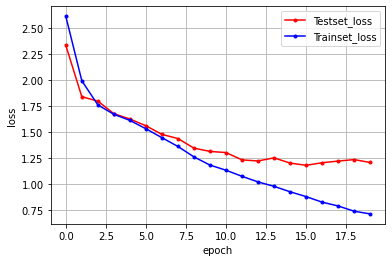

In [17]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---

In [0]:
## 신경망 perceptron에 대해 좀더 알아보자 
## 훈련 후 모델을 저장하고 애플리케이션이 필요할 때 이를 복원할 수 있어야 한다. 

In [19]:
'''(복습)
신경망
 유닛(뉴런)은 하나 이상의 입력을 받아 각 입력에 파라미터(가중치)를 곱합니다.
 가중치가 곱해진 입력에 절편 값을 더하고 활성화 함수에 전달합니다
 신경망은 일련의 연결된 층으로 표현할 수 있으며 한쪽 끝에는 샘플의 특성값과 다른 한쪽에는 타깃값을 연결한
네트워크입니다.
 신경망을 만들 때 가우시안 분포나 균등 분포를 따르는 작은 난수값으로 모든 모델 파라미터를 초기화합니다.
 샘플 하나가 신경망에 주입되면 손실 함수를 사용해 출력 값과 샘플의 진짜 타깃값을 비교합니다. (정계산 계산)
 예측과 정답 간의 오차에 각 모델 파라미터가 얼마나 기여했는지 파악하기 위해 네트워크 역방향으로 진행합니다.
(역전파)
 각 모델 파라미터에 대해 최적화 알고리즘은 출력을 개선하려면 가중치를 얼마나 조정해야 하는지 결정합니다.
 신경망은 훈련 데이터에 있는 모든 샘플에 대해 정방향 계산과 역전파를 여러 번 반복하면서 학습됩니다. (epoch)
 훈련 과정은 여러 epoch로 구성됩니다.
 케라스는 텐서플로나 씨아노를 엔진으로 사용하는 고수준 라이브러리입니다.
 케라스로 만든 신경망은 CPU나 GPU를 사용해 훈련할 수 있습니다
 네크워크가 크고 훈련 데이터가 많을 때는 GPU를 사용해 훈련해야 합니다.
'''

'(복습)\n신경망\n\uf0a7 유닛(뉴런)은 하나 이상의 입력을 받아 각 입력에 파라미터(가중치)를 곱합니다.\n\uf0a7 가중치가 곱해진 입력에 절편 값을 더하고 활성화 함수에 전달합니다\n\uf0a7 신경망은 일련의 연결된 층으로 표현할 수 있으며 한쪽 끝에는 샘플의 특성값과 다른 한쪽에는 타깃값을 연결한\n네트워크입니다.\n\uf0a7 신경망을 만들 때 가우시안 분포나 균등 분포를 따르는 작은 난수값으로 모든 모델 파라미터를 초기화합니다.\n\uf0a7 샘플 하나가 신경망에 주입되면 손실 함수를 사용해 출력 값과 샘플의 진짜 타깃값을 비교합니다. (정계산 계산)\n\uf0a7 예측과 정답 간의 오차에 각 모델 파라미터가 얼마나 기여했는지 파악하기 위해 네트워크 역방향으로 진행합니다.\n(역전파)\n\uf0a7 각 모델 파라미터에 대해 최적화 알고리즘은 출력을 개선하려면 가중치를 얼마나 조정해야 하는지 결정합니다.\n\uf0a7 신경망은 훈련 데이터에 있는 모든 샘플에 대해 정방향 계산과 역전파를 여러 번 반복하면서 학습됩니다. (epoch)\n\uf0a7 훈련 과정은 여러 epoch로 구성됩니다.\n\uf0a7 케라스는 텐서플로나 씨아노를 엔진으로 사용하는 고수준 라이브러리입니다.\n\uf0a7 케라스로 만든 신경망은 CPU나 GPU를 사용해 훈련할 수 있습니다\n\uf0a7 네크워크가 크고 훈련 데이터가 많을 때는 GPU를 사용해 훈련해야 합니다.\n'

In [20]:
'''
신경망을 위한 데이터 전처리
 신경망에 사용할 데이터는 사이킷런의 StandardScaler를 사용해 특성을 표준화합니다.
 신경망의 모델 파라미터는 작은 난수로 초기화합니다.
 특성값이 모델 파라미터보다 크면 종종 신경망의 성능이 나빠집니다
 샘플의 특성값이 개별 유닛을 통과하면서 합쳐치기 때문에 모든 특성이 같은 스케일을 가지는 것이 중요합니다
'''

from sklearn import preprocessing
import numpy as np
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)
features_standardized

print("평균:", round(features_standardized[:,0].mean())) # 평균과 표준 편차를 출력합니다
print("표준 편차:", features_standardized[:,0].std())

평균: 0.0
표준 편차: 0.9999999999999999


In [21]:
'''
신경망 구성
1. 각 은닉층과 출력층에 대해 층에 사용할 유닛 개수와 활성화 함수를 정의
 층에 유닛을 많이 추가할수록 네트워크는 더 복잡한 패턴을 학습할 수 있습니다
 유닛이 많으면 네트워크가 훈련 데이터에 과대적합 될 수 있으며 테스트 세트에서 성능이 나빠집니다.
2. 네트워크에 사용할 여러 은닉층을 정의
3. 출력층의 활성화 함수를 정의해야 합니다.
 이진분류 : 시그모이드 함수와 하나의 유닛
 다중분류 : 소프트맥스 활성화 함수와 k개의 유닛(k는 타깃 클래스의 개수)
 회귀 : 아무런 활성화 함수를 사용하지 않는 하나의 유닛
4. 손실 함수(예측값이 타깃값과 얼마나 잘 맞는지 측정하는 함수)를 정의
 이진분류 : 이진 크로스엔트로피
 다중분류 : 범주형 크로스엔트로피
 회귀 : 평균 제곱 오차
5. 옵티마이저를 정의
 확률적 경사 하강법, 모멘텀을 사용한 확률적 경사 하강법, RMSProp, Adam등 가장 작은 손실 함수 오차를 만드는
모델 파라미터 값을 찾는 옵티마이저를 정의합니다.
6. 정확도와 같은 성능을 평가하기 위해 사용할 하나 이상의 성능 지표를 선택
'''

# 케라스의 Sequential 모델은 층을 쌓는 식으로 신경망을 만듭니다.
from keras import models
from keras import layers

network = models.Sequential() # 신경망 모델 생성
#활성화 함수를 가진 16개의 유닛으로 구성
#케라스에서 네트워크의 첫 번째 은닉층은 input_shape 매개변수를 포함해야 합니다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,))) #입력층

network.add(layers.Dense(units=16, activation="relu")) #은닉층

#이진 분류가 목적이므로 출력층은 시그모이드 활성화 함수를 사용한 유닛 하나만 포함합니다.
network.add(layers.Dense(units=1, activation="sigmoid")) #출력층
# 신경망의 모델 설정.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

#summary()를 사용하면 추가된 층과 가중치 개수를 확인
network.summary() #실행시마다 숫자가 늘어난다. 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 케라스의 함수형 API는 입력과 출력을 정의한 다음 Model 클래스에 전달하여 신경망을 만듭니다.
# 입력에서부터 출력까지 세 개의 완전 연결 층을 연결합니다.
x = layers.Input(shape=(10,))
h1 = layers.Dense(units=16, activation="relu")(x)
h2 = layers.Dense(units=16, activation="relu")(h1)
y = layers.Dense(units=1, activation="sigmoid")(h2)

# 신경망 모델을 만듭니다.
network = models.Model(x, y)

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표
network.summary()

dense = layers.Dense(units=16, activation="relu")
h1 = dense(x)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [23]:
#이진 분류기 훈련
# 케라스를 사용하여 피드포워드 신경망을 만들고 fit()로 훈련합니다.

'''
50,000개의 영화 리뷰 데이터를 사용
 가장 자주 등장하는 단어 1,000개를 사용해 리뷰 텍스트를 단어의 등장 여부를 나타내는 1,000개의 이진 특성으로
변환합니다.
 신경망은 1,000개의 특성으로 이루어진 25,000개의 샘플을 사용하여 영화 리뷰가 긍정적인지 부정적인지를 예측
합니다.
 epochs 매개변수는 훈련할 때 사용할 에폭 횟수를 정의합니다.
 batch_size는 모델 파라미터를 업데이트하기 전에 네트워크를 통과시킬 샘플 개수를 설정
 특성과 타깃 벡터를 validation_data 매개변수로 전달하여 평가에 사용할 수 있습니다.
 validation_split 매개변수는 훈련 데이터에서 평가에 사용할 비율을 정의
 compile()의 metrics 매개변수를 지정하지 않으면 기본적으로 손실값만 계산하여 출력합니다.
 evaluate()는 케라스에서 모델의 성능을 평가하는 메서드로 손실값과 metric 매개변수에 지정한 성능 지표를 계산
하여 출력합니다.

 케라스에 포함된 IMDB 데이터는 텍스트를 정수의 리스트로 변환해놓은 것입니다.
 Tokenizer 클래스의 num_words 매개변수를 지정하고 sequences_to_matrix 메서드를 호출하면 num_words 값보다
큰 정수는 모두 제외시키고 mode 매개변수에서 지정한 방식에 맞추어 행렬을 만듭니다.
 mode 매개변수가 binary이면 시퀀스에 등장한 정수에 해당하는 위치에 1을 저장합니다.
 count이면 시퀀스에 등장하는 횟수를 저장합니다.
 freq이면 등장 회수를 시퀀스의 길이로 나눕니다
'''

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 1000 # 필요한 특성 개수를 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 생성
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=( number_of_features,))) #입력층
network.add(layers.Dense(units=16, activation="relu")) #은닉층
network.add(layers.Dense(units=1, activation="sigmoid")) #출력층
network.compile(loss="binary_crossentropy", # 크로스 엔트로피

optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표
history = network.fit(features_train, # 특성
                        target_train, # 타깃 벡터
                            epochs=3, # 에포크 횟수
                           verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

network.evaluate(features_test, target_test)

17465344/17464789 [==============================] - 2s 0us/step
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 75us/step - loss: 0.4239 - acc: 0.8112 - val_loss: 0.3458 - val_acc: 0.8530
Epoch 2/3
25000/25000 [==============================] - 1s 54us/step - loss: 0.3237 - acc: 0.8647 - val_loss: 0.3291 - val_acc: 0.8616
Epoch 3/3
25000/25000 [==============================] - 1s 40us/step


[0.3356134099626541, 0.85592]

In [0]:
# 다중 분류기 훈련
# 다중 분류 신경망 학습은 출력층에 소프트맥스 활성화 함수를 사용하는 피드포워드 신경망을 만듭니다.

# 11,228개의 로이터 뉴스 , 각 뉴스는 46개의 토픽으로 분류
# 뉴스의 단어 등장 여부를 나타내는 5,000개의 이진특성으로 변환하여 특성 데이터를 준비
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 5000 # 필요한 특성 개수 지정
data = reuters.load_data(num_words=number_of_features) #데이터를 로드
(data_train, target_vector_train), (data_test, target_vector_test) = data

# 특성 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 타깃 벡터를 원-핫 인코딩하여 타깃 행렬로 변환
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [25]:
network = models.Sequential()
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=100, activation="relu"))

#소프트맥스 활성화 함수는 46개의 값을 담은 배열을 반환
network.add(layers.Dense(units=46, activation="softmax"))

# 신경망의 모델 설정
#다중 분류에 맞는 손실 함수인 범주형 크로스엔트로피를 사용하기 위해 categorical_crossentropy로 설정
network.compile(loss="categorical_crossentropy", # 크로스 엔트로피
                            optimizer="rmsprop", # 옵티마이저
                            metrics=["accuracy"]) # 성능 지표

history = network.fit(features_train, # 특성
                        target_train, # 타깃
                            epochs=3, # 3 에포크
                           verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

target_train ## 타깃 행렬을 확인

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# 회귀 모델 훈련
#  케라스를 사용해 활성화 함수 없이 출력 유닛 하나로 구성된 피드포워드 신경망을 만듭니다.
#  출력값을 0과 1사이로 제한하는 시그모이드 활성화 함수를 제거하면 연속적인 값을 출력할 수 있습니다.

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(0) ## 랜덤 시드 설정
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

features_train, features_test, target_train, target_test = train_test_split(
      features, target, test_size=0.33, random_state=0)

In [0]:
network = models.Sequential()
network.add(layers.Dense(units=32, activation="relu", input_shape=(features_train.shape[1],)))
network.add(layers.Dense(units=32, activation="relu"))
network.add(layers.Dense(units=1))

# 신경망의 모델 설정
# 회귀모델의 손실함수와 평가지표는 평균 제곱 오차
network.compile(loss="mse", # 평균 제곱 오차
                optimizer="RMSprop", # 옵티마이저
                metrics=["mse"]) # 성능 지표

history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=10, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

In [28]:
# 예측

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0) # 랜덤 시드를 설정
number_of_features = 10000 # 필요한 특성 개수를 지정
# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy", # 크로스 엔트로피
optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표

history = network.fit(features_train, # 특성
                        target_train, # 타깃 벡터
                            epochs=3, # 에포크 횟수
                            verbose=0, # 출력 없음
                        batch_size=100, # 배치의 샘플 개수
                        validation_data=(features_test, target_test)) # 테스트 데이터

predicted_target = network.predict(features_test) # 테스트 세트의 클래스를 예측
# 첫 번째 샘플이 클래스 1이 될 확률을 확인합니다.
predicted_target[0]

array([0.07036713], dtype=float32)

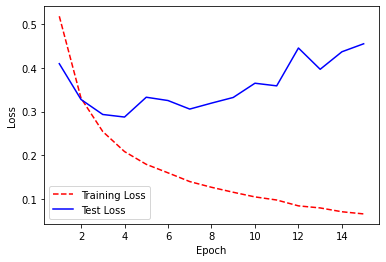

In [29]:
#훈련 기록 시각화
#  신경망이 훈련 데이터를 학습함에 따라 훈련 세트와 테스트 세트에 대한 모델의 오차가 감소하는 경향을 보입니다.
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
number_of_features = 10000 # 필요한 특성 개수를 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid")) 

network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show() # 손실 값의 기록을 시각화

In [35]:
#기록확인 
history.history

{'acc': [0.7920000004768372,
  0.8930399990081788,
  0.9147599983215332,
  0.9277599978446961,
  0.9390399980545044,
  0.9461599922180176,
  0.9539199924468994,
  0.959159996509552,
  0.9623600006103515,
  0.9653199982643127,
  0.9690000033378601,
  0.9737199974060059,
  0.9749200034141541,
  0.9780400013923645,
  0.9806799983978272],
 'loss': [0.5175104343891144,
  0.33045307755470277,
  0.25435923278331757,
  0.20870738506317138,
  0.1795890063047409,
  0.16017767608165742,
  0.1402315989136696,
  0.12720301300287246,
  0.11584872514009475,
  0.1052429872751236,
  0.09816034525632858,
  0.08480535954236984,
  0.08007167145609856,
  0.07136154606938362,
  0.0664260333776474],
 'val_acc': [0.858840000629425,
  0.883800003528595,
  0.8887600016593933,
  0.8862799978256226,
  0.864520001411438,
  0.8721599960327149,
  0.8798000025749206,
  0.8779200029373169,
  0.875,
  0.8675600004196167,
  0.8733199977874756,
  0.8520800065994263,
  0.8700800013542175,
  0.8601599979400635,
  0.8592000

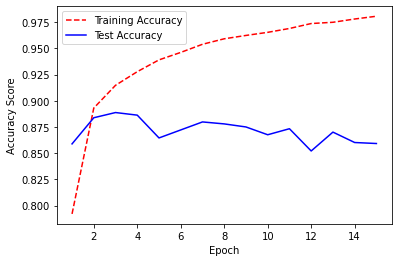

'총평\n\uf0a7 어떤 지점에선 신경망이 훈련 데이터를 암기하기 시작하여 과대적합이 됩니다. \n  ( 훈련 오차는 감소하지만 테스트 오차는 증가하기 시작합니다.)\n\uf0a7대부분의 경우 테스트 오차(주요 관심 대상인 오차)가 가장 낮은 지점이 최적점입니다\n'

In [37]:
## 훈련 정확도와 테스트 정확도 기록을 저장합니다.
training_accuracy = history.history["acc"]
test_accuracy = history.history["val_acc"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

'''총평
 어떤 지점에선 신경망이 훈련 데이터를 암기하기 시작하여 과대적합이 됩니다. 
  ( 훈련 오차는 감소하지만 테스트 오차는 증가하기 시작합니다.)
대부분의 경우 테스트 오차(주요 관심 대상인 오차)가 가장 낮은 지점이 최적점입니다
'''

In [0]:
# 가중치 규제로 과대적합 줄이기
#  가중치 규제는 네트워크 모델 파라미터를 제한하여 과대 적합을 줄이는 것입니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 1000 # 필요한 특성 개수 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

In [0]:
'''
 신경망의 모델 파라미터(가중치)가 작은 값을 갖도록 제한을 가하는 것입니다.
 케라스에서는 층의 매개변수로 kernel_regularizer=regularizers.l2(0.01)를 지정하여 가중치 규제를 추가할 수 있습
니다.
'''
# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

network.add(layers.Dense(units=16, activation="relu", kernel_regularizer='l1_l2',
            input_shape=(number_of_features,)))

In [43]:
'''
조기종료로 과대적합 줄이기
 테스트 손실이 더 이상 감소하지 않을 때 학습을 멈추고 조기 종료합니다.
 과대적합을 해결하는 가장 일반적이고 효과적인 방법 중 하나는 훈련 과정을 감시하여 테스트 오차가 증가하기 시
작할 때 훈련을 멈추는 것입니다.
'''
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 1000 # 필요한 특성 개수를 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
             monitor="val_loss",
             save_best_only=True)]

history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=20, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=0, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

'''
 케라스에서는 콜백 함수로 조기 종료를 구현합니다.
 콜백 함수는 학습 과정의 특정 단계에 적용할 수 있는 함수입니다.
 EarlyStoping(monitor='val_loss', patience=2)를 추가하여 에폭마다 테스트(검증) 손실을 감시하여 연속적으로 2에
폭 동안 테스트 손실이 향상되지 않으면 훈련을 멈추도록 설정했습니다
'''

"\n\uf0a7 케라스에서는 콜백 함수로 조기 종료를 구현합니다.\n\uf0a7 콜백 함수는 학습 과정의 특정 단계에 적용할 수 있는 함수입니다.\n\uf0a7 EarlyStoping(monitor='val_loss', patience=2)를 추가하여 에폭마다 테스트(검증) 손실을 감시하여 연속적으로 2에\n폭 동안 테스트 손실이 향상되지 않으면 훈련을 멈추도록 설정했습니다\n"

In [0]:
'''
드롭아웃으로 과대적합 줄이기
 dropout을 사용하여 네트워크에 구조적으로 잡음을 추가합니다

 드롭아웃은 신경망을 규제하는 강력하고 인기 높은 방법입니다.
 드롭아웃에서는 샘플의 배치가 훈련을 위해 만들어질 때마다 한개 이상의 층에서 유닛의 일부에 0을 곱합니다.
 설정에서 모든 배치가 같은 네트워크에서 훈련되지만 모든 배치는 조금씩 다른 버전의 네트워크 구조를 만납니다.
 드롭아웃이 배치마다 같은 수의 유닛을 랜덤하게 끕니다.
 다른 은닉 유닛에 있는 문제에 영향을 받지 않도록 학습됩니다.
 네트워크가 훈련 데이터를 단순히 암기하지 못하도록 합니다.

 은닉층과 입력층에 모두 드롭아웃을 추가할 수 있습니다.
 입력층이 드롭아웃되면 해당 배치의 그 특성값이 네트워크에 전달되지 않습니다.
 케라스에서는 Dropout층을 네트워크에 추가하여 드롭아웃을 구현할 수 있습니다.
 각 Dropout층은 배치마다 이전 층에 있는 유닛을 사용자가 지정한 비율만큼 드롭할 것입니다.
 입력층에 드롭아웃을 추가하고 싶다면 네트워크에 드롭아웃층을 첫 번째 층으로 추가해야 합니다.
'''

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 1000 # 필요한 특성 개수를 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
network = models.Sequential()

# 입력층으로 드롭아웃 층을 추가
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu")) #은닉층
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid")) #출력층

network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

In [0]:
'''
모델 훈련 진행 과정 저장
 콜백 함수 ModelCheckpoint를 사용해 에폭이 끝날 때마다 모델을 저장할 수 있습니다.

 ModelCheckpoint는 filepath 매개변수에 지정된 위치에 모델을 저장합니다.
 손실 함수의 성능에 따라 최상의 모델만 저장하고 싶다면 save_best_only=True와 monitor='val_loss'로 설정합니다.
 이전 모델보다 테스트 손실 점수를 포함시키는 식으로 모든 에폭의 모델을 각각의 파일에 저장할 수 있습니다.
'''
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 1000 # 필요한 특성 개수를 지정

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data( num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))

network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수 설정
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]
              
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=3, # 에포크 횟수
                      callbacks=checkpoint, # 체크포인트
                      verbose=0, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

In [0]:
'''
신경망 k-폴드 교차검증
 케라스의 사이킷런 래퍼(wrapper)를 사용하면 Sequential 모델에서 시이킷런 API를 사용할 수 있습니다.
 케라스의 신경망 모델을 사이킷런의 인터페이스와 호환되도록 감싸면 k-폴드 교차검증을 포함하여 사이킷런의 평
가 도구를 사용할 수 있습니다.
 KerasClassifier 클래스로 사이킷런에서 사용할 수 있도록 모델을 감쌉니다.
'''

import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 100 # 특성 개수
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

In [47]:
'''
 오랜 시간이 걸리는 훈련에 k-폴드 교차검증 계산 비용을 추가하는 것은 권장하지 않습니다.
 데이터가 많다면 단순하게 테스트 세트에서 신경망을 평가하는 것이 적절합니다.
 데이터가 적다면 신경망의 성능을 가장 잘 평가하기 위해 k-폴드 교차검증을 사용할 수 있습니다.
'''
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=( number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer="rmsprop", # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    return network
# 케라스 모델을 래핑하여 사이킷런에서 사용할 수 있도록 만듭니다.
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

# 3-폴드 교차검증을 사용하여 신경망을 평가합니다.
cross_val_score(neural_network, features, target, cv=3)

array([0.90611878, 0.90549055, 0.88748875])

In [48]:
#신경망 튜닝
# 최적화 알고리즘, 에폭 횟수, 배치 크기 등 여러 옵션을 대상으로 교차검증 그리드 서치를 수행합니다
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

np.random.seed(0) # 랜덤 시드 설정
number_of_features = 100 # 특성 개수

features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    return network

# 사이킷런에서 사용할 수 있도록 케라스 모델을 감쌉니다.
neural_network = KerasClassifier(build_fn=create_network, verbose=0)    
# 하이퍼파라미터 탐색 영역을 정의합니다.
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
# 하이퍼파라미터 그리드를 만듭니다.
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
grid_result = grid.fit(features, target)
grid_result.best_params_ # 최상의 신경망 하이퍼파라미터를 확인  

{'batch_size': 5, 'epochs': 5, 'optimizer': 'adam'}

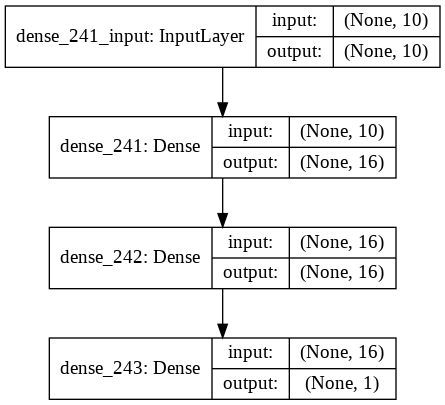

In [49]:
'''
신경망 시각화
 케라스의 model_to_dot이나 plot_model을 사용합니다.
 show_shapes 매개변수는 입력과 출력의 크기를 보여주어 디버깅에 도움이 됩니다.
'''
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

# 신경망 구조를 시각화한 그림를 파일로 저장합니다.
plot_model(network, show_shapes=True, to_file="/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/network.png")

In [0]:
'''
이미지 분류
 케라스에서 하나 이상의 합성곱층으로 신경망을 사용해 이미지를 분류할 수 있습니다.

 피드포워드 신경망에서 각 픽셀이 특성이 되는 식으로 이미지를 처리 할 수 있습니다.
 피드포워드 신경망은 픽셀의 공간 구조를 다루지 못합니다
 피드포워드 신경망은 지역 패턴 대신 전체적인 특성의 관계를 학습합니다.
 피드포워드 신경망은 물체가 이미지에 나타나는 위치에 상관없이 감지할 수 있는 능력이 없습니다.

 합성곱 신경망(ConvNet)은 컴퓨터 비전 작업에 매우 효과적이라고 증명된 네트워크으로 합성곱은 개별 픽셀과 주
변 픽셀을 함께 보면서 이미지 위를 슬라이딩하는 윈도 입니다.
'''
'''
 이미지 데이터를 새로운 3차원 텐서로 변환합니다.
 처음 두 차원은 비슷한 너비와 높이를 가지지만 세번째 차원은 픽셀이 속한 패턴을 나타냅니다.
 폴링층은 데이터 위에서 윈도를 이동하면서 어떤 방식으로 윈도의 값을 요약하여 데이터 크기를 줄입니다.
 윈도 안의 최댓값을 다음 층으로 보내는 최대 풀링입니다.
 최대 풀링을 사용하는 이유는 합성곱 단계에서 매우 빠르게 학습할 모델 파라미터를 많이 만드는 실용성입니다.
 최대 풀링은 이미지를 줌 아웃하는 것으로 생각할 수 있습니다.
1. 합성곱층을 추가하고 필터의 수와 다른 매개변수를 지정합니다. 윈도 크기는 하이퍼파라미터입니다.
2. 이웃한 픽셀을 요약하기 위해 최대 풀링층을 추가합니다.
3. 과대적합의 가능성을 줄이기 위해 드롭아웃층을 추가합니다.
4. 합성곱의 출력을 완전 연결층에 사용될 수 있도록 바꾸기 위해 flatten층을 추가합니다.
5. 은닉층과 실제 분류를 수행할 출력층을 추가합니다.
 합성곱층과 완전 연결층에 있는 가중치 개수를 쉽게 비교해 볼 수 있습니다.
 합성곱층의 가중치 크기는 입력에 상관없이 필터에 의해 결정
'''

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_data_format("channels_first") # 컬러 채널이 처음에 오도록 설정합니다.
np.random.seed(0) # 랜덤 시드 지정
channels = 1 # 이미지 정보 설정
height = 28
width = 28
# MNIST 데이터에서 훈련 데이터와 타깃 데이터를 로드합니다.
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# 훈련 이미지 데이터를 특성의 크기로 바꿉니다.
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
# 테스트 이미지 데이터를 특성의 크기로 바꿉니다.
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

In [0]:
features_train = data_train / 255 # 0과 1사이로 픽셀 강도의 스케일을 조정합니다
features_test = data_test / 255
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
network = Sequential()
# 64 필터, 5x5 윈도, 렐루 활성화 함수를 사용하는 합성곱 층을 추가합니다.
network.add(Conv2D(filters=64,
kernel_size=(5, 5),
input_shape=(channels, width, height),
activation='relu'))
# 2x2 윈도를 사용하는 최대 풀링 층을 추가합니다.
network.add(MaxPooling2D(pool_size=(2, 2)))
# 드롭아웃 층을 추가합니다.
network.add(Dropout(0.5))

In [53]:
# 5x5 크기의 필터를 64개 사용했고 한 개의 절편이 필요하므로 총 가중치 개수는 5x5x64+64
# 은닉층은 입력 크기와 유닛 개수를 곱하고 절편을 더하면 총 가중치 개수는 9216x128+128개입니다.
network.add(Flatten()) ## 입력을 일렬로 펼치기 위한 층을 추가

# 렐루 활성화 함수를 사용한 128개 유닛의 완전 연결 층을 추가합니다.
network.add(Dense(128, activation="relu"))
network.add(Dropout(0.5)) # 드롭아웃 층을 추가
network.add(Dense(number_of_classes, activation="softmax")) # 소프트맥스 활성화 함수를 사용하는 출력층
network.compile(loss="categorical_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

network.fit(features_train, # 특성
            target_train, # 타깃
            epochs=2, # 에포크 횟수
            verbose=0, # 출력 없음
            batch_size=1000, # 배치의 샘플 개수
            validation_data=(features_test, target_test)) # 검증 데이터
network.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_244 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_245 (Dense)            (None, 10)              

In [61]:
'''
이미지 증식으로 성능 향상
 성능을 높이려면 ImageDataGenerator를 사용하여 이미지를 전처리하고 데이터를 증식시킵니다.
 이미지에 대해 합성곱 신경망을 훈련할 때는 여러 가지 방식으로 이미지를 랜덤하게 변환하여 샘플에 잡음을 추가
할 수 있습니다.
 ImageDataGenerator는 이미지를 랜덤 확대, 이동, 반전, 회전 등 일부 변환을 적용합니다.
 featurewise_center=True를 사용해 전체 데이터에 걸쳐 픽셀값을 표준화합니다.
 잡음을 추가하면 안정적이고 데이터에 과대적합되는 것을 막아주기 때문입니다.
 agument_images가 제너레이터이기 때문에 신경망을 훈련할 대 fit_generator()를 사용해야 합니다.
'''
from keras.preprocessing.image import ImageDataGenerator

# 이미지 증식을 위해 객체를 만듭니다.
augmentation = ImageDataGenerator(featurewise_center=True, # ZCA 화이트닝(whitening)을 적용합니다.
                                  zoom_range=0.3, # 이미지를 랜덤하게 확대합니다.
                                  width_shift_range=0.2, # 이미지를 랜덤하게 이동합니다.
                                  horizontal_flip=True, # 이미지를 랜덤하게 뒤집습니다.
                                  rotation_range=90) # 랜덤하게 회전합니다.

# 'raw/images' 디렉토리에 있는 모든 이미지에 적용합니다.
augment_images = augmentation.flow_from_directory("/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/images/", # Image folder
                                                   batch_size=32, # 배치 크기
                                                   class_mode="binary", # 클래스
                                                   save_to_dir="/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/ImgGenerator/")
                                                    #처리된 이미지 저장 폴더 지정 

Found 0 images belonging to 0 classes.


In [56]:
# 텍스트 분류방식
'''
텍스트 분류
 인공지능이 문장을 듣고 이해한다는 것은 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해서
학습하는 것입니다.
 입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업입니다.
 순환 신경망(Recurrent Neural Network, RNN) 은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력 받은 데
이터를 잠시 기억해 놓는 방법입니다.
 그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어갑니다.
 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보입니다
   → RNN이 다른 신경망과 구별되는 차이점 (그림참고)
'''

''' RNN
 RNN 처리 방식 : 순환 부분에서 단어를 하나 처리할 때마다 단어마다 기억하여 다음 입력 값의 출력을 결정합니다.
 순환이 되는 가운데 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 주는 것을 알 수 있습니다. 이렇
게 해야지만, 비슷한 두 문장이 입력되었을 때 그 차이를 구별하여 출력 값에 반영할 수가 있습니다.
'''

''' LSTM과 RNN
 LSTM(Long Short Term Memory) 방법을 함께 사용하는 기법이 현재 가장 널리 사용되고 있습니다. LSTM은 한 층
안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제(9장의 “기울기 소실 문제와 활성
화 함수” 절 참조)가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다.
 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것입니다.
'''


' LSTM과 RNN\n\uf0a7 LSTM(Long Short Term Memory) 방법을 함께 사용하는 기법이 현재 가장 널리 사용되고 있습니다. LSTM은 한 층\n안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제(9장의 “기울기 소실 문제와 활성\n화 함수” 절 참조)가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법입니다.\n\uf0a7 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것입니다.\n'